In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('customer_churn_data.csv')

In [3]:
df.sample(5)

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
945,946,34,Male,11,65.63,Month-to-Month,DSL,721.93,No,Yes
77,78,42,Female,11,89.58,Month-to-Month,NaN,985.38,No,Yes
616,617,46,Female,26,30.57,One-Year,NaN,794.82,No,Yes
114,115,43,Male,23,67.01,Month-to-Month,Fiber Optic,1541.23,Yes,Yes
285,286,25,Male,43,105.44,Month-to-Month,Fiber Optic,4533.92,No,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [5]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [6]:
df['InternetService'] = df["InternetService"].fillna("No record")

In [7]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
Tenure             0
MonthlyCharges     0
ContractType       0
InternetService    0
TotalCharges       0
TechSupport        0
Churn              0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.drop(columns=["CustomerID"], inplace=True)

In [10]:
df.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,1000.000000,1000.00000,1000.000000,1000.000000
mean,44.674000,18.97300,74.391290,1404.364060
std,9.797741,18.89257,25.712083,1571.755048
min,12.000000,0.00000,30.000000,0.000000
25%,38.000000,5.00000,52.357500,345.217500
50%,45.000000,13.00000,74.060000,872.870000
75%,51.000000,26.00000,96.102500,1900.175000
max,83.000000,122.00000,119.960000,12416.250000


In [11]:
numeric_columns = df.select_dtypes(include=['number'])

In [12]:
numeric_columns.corr()

,Age,Tenure,MonthlyCharges,TotalCharges
Age,1.000000,0.000472,0.006362,-0.001896
Tenure,0.000472,1.000000,-0.014552,0.894868
MonthlyCharges,0.006362,-0.014552,1.000000,0.304893
TotalCharges,-0.001896,0.894868,0.304893,1.000000


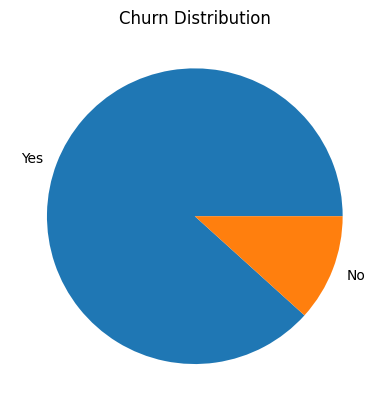

In [13]:
df['Churn'].value_counts().plot(kind='pie', title='Churn Distribution')
plt.ylabel('')
plt.show()

<Axes: title={'center': 'Average Monthly Charges by Churn'}, xlabel='Churn'>

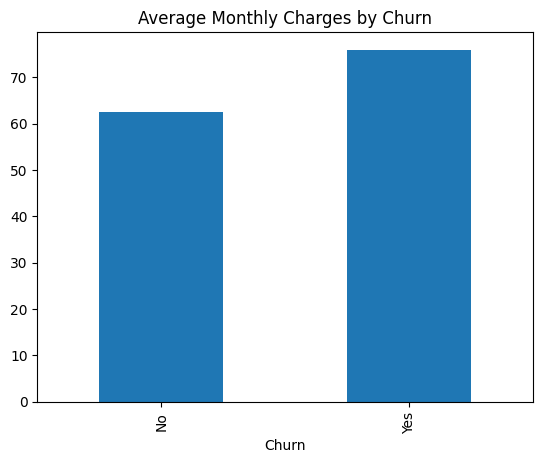

In [14]:
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar', title='Average Monthly Charges by Churn')

<Axes: title={'center': 'Gender wise Churn Distribution'}, xlabel='Churn'>

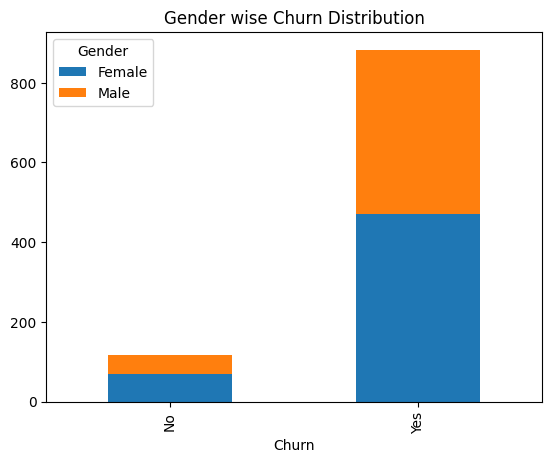

In [15]:
df.groupby('Churn')['Gender'].value_counts().unstack().plot(kind='bar', stacked=True, title = "Gender wise Churn Distribution")

<Axes: title={'center': 'Average Monthly Charges by Churn and Gender'}, xlabel='Churn'>

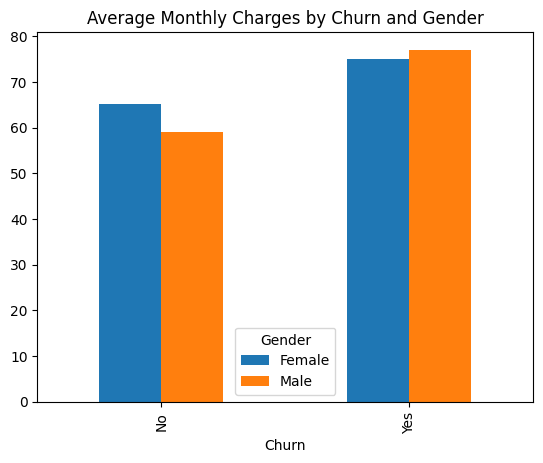

In [16]:
df.groupby(['Churn', 'Gender'])['MonthlyCharges'].mean().unstack().plot(kind='bar', title='Average Monthly Charges by Churn and Gender')

<Axes: title={'center': 'Average Tenure by Churn'}, xlabel='Churn'>

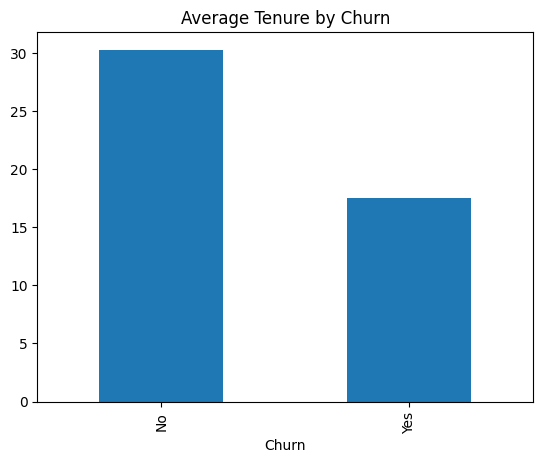

In [17]:
df.groupby('Churn')['Tenure'].mean().plot(kind='bar', title='Average Tenure by Churn')  

<Axes: title={'center': 'Average Age by Churn'}, xlabel='Churn'>

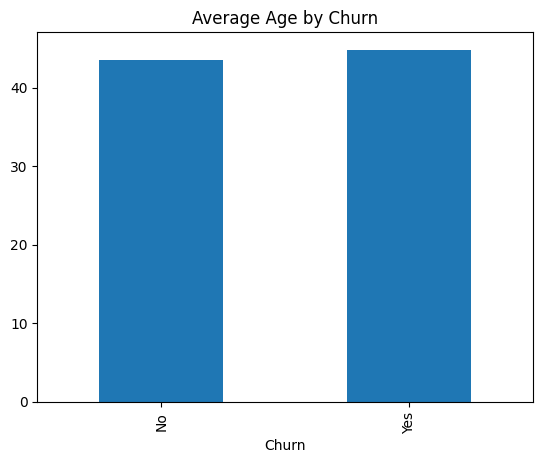

In [18]:
df.groupby('Churn')['Age'].mean().plot(kind='bar', title='Average Age by Churn')

<Axes: title={'center': 'Average Monthly Charges by Contract Type'}, xlabel='ContractType'>

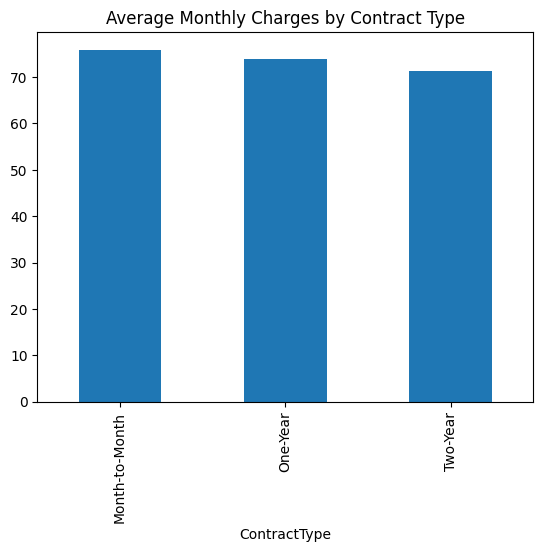

In [19]:
df.groupby('ContractType')['MonthlyCharges'].mean().plot(kind='bar', title='Average Monthly Charges by Contract Type')

<Axes: title={'center': 'Contract Type Distribution by Churn'}, xlabel='Churn'>

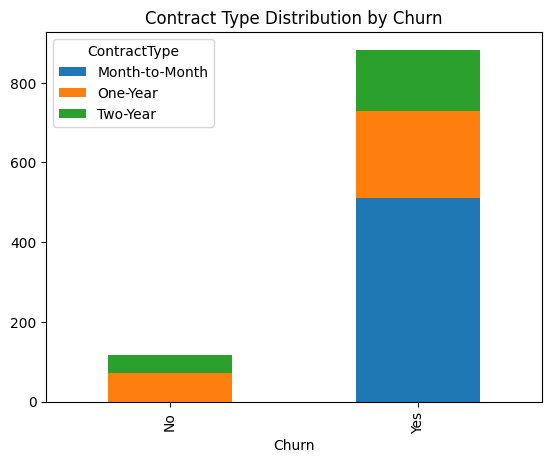

In [20]:
df.groupby('Churn')['ContractType'].value_counts().unstack().plot(kind='bar', stacked=True, title='Contract Type Distribution by Churn')

<Axes: xlabel='Churn', ylabel='count'>

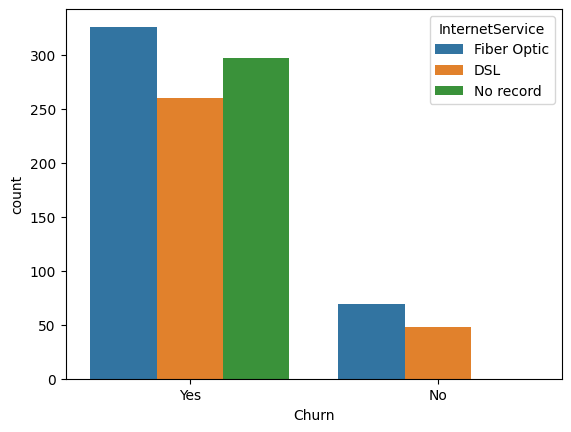

In [21]:
sns.countplot(data=df, x='Churn', hue='InternetService')